# Simulação de Monte Carlo

Fonte: *Hands-On Simulation Modelling with Python*, Capítulo 4

In [8]:
## Importando módulos
# Análises
import random
import math
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

## Teorema do Limite Central e Lei dos Grandes Números

**Lei dos Grandes Números**: para amostras grandes, a estatística amostral corresponderá ao estimador da estatística populacional.

**Teorema do Limite Central**: dado um *dataset* com uma distribuição desconhecida, a média das amostras aproximará uma distribuição normal.

Se a Lei dos Grandes Números permite que avaliemos o valor médio, o Teorema do Limite Central nos dá informação sobre a distribuição (normal) dessas médias.

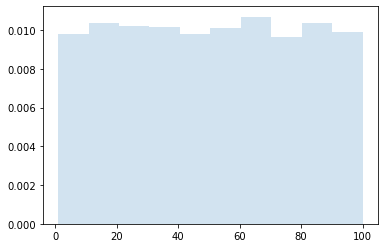

In [2]:
## Definindo parâmetros
# Extremos do intervalo
a = 1
b = 100
# Número de simulações
N = 10000

## Criando uma distribuição uniforme entre a e b e tirando da forma de array
DataPop=list(np.random.uniform(a, b, N))

## Plottando a densidade
plt.hist(DataPop, density=True, histtype='stepfilled', alpha=0.2)
plt.show()

/Users/vinicius/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


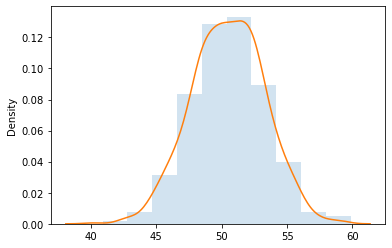

In [10]:
### Testando o Teorema do Limite Central
## Inicializando lista para guardar as médias de cada amostra
SamplesMeans = []

## Gerando 1000 subamostras e calculando a média
nSubAmostras = 1000
for i in range(0, nSubAmostras):
    ## Pegando uma amostra de tamanho 100 da distribuição
    DataExtracted = random.sample(DataPop, k=100)

    ## Adicionando a média à lista
    DataExtractedMean = np.mean(DataExtracted)
    SamplesMeans.append(DataExtractedMean)

## Plottando a distribuição da média e comparando com uma normal
plt.figure()
plt.hist(SamplesMeans, density=True, histtype='stepfilled', alpha=0.2)
sns.distplot(np.random.normal(np.mean(SamplesMeans), np.std(SamplesMeans), nSubAmostras), hist=False)
plt.show()

## Simulando $\pi$

Número de simulações: 20000
Aproximação de Pi: 3.138


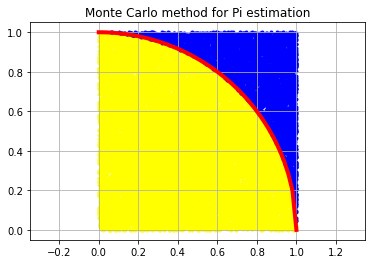

In [4]:
## Criando parâmetros
# Número de pontos a serem gerados
N = 20000
# Número de pontos que caem dentro do círculo
M = 0

## Inicializando listas com as coordenadas (x, y) de cada ponto
XCircle = []
YCircle = []
XSquare = []
YSquare = []

## Performando as 20.000 simulações
for p in range(N):
    # Gerando número normais entre 0 e 1 para cada coordenada
    x=random.random()
    y=random.random()

    # Vendo se o ponto cai na área delimitada pelo quarto de círculo
    if x ** 2 + y ** 2 <= 1:
        # Adicionando um a contagem dos pontos que caem no círculo
        M+=1
        # Adicionando as coordenadas às listas dos pontos DENTRO do círculo
        XCircle.append(x)
        YCircle.append(y)
    else:
        # Adicionando as coordenadas às listas dos pontos FORA do círculo
        XSquare.append(x)
        YSquare.append(y)

# Calculando a aproximação de Pi (4: 1/4 do círculo)
Pi = 4 * M / N

# Printando os valores
print(f"Número de simulações: {N}")
print(f"Aproximação de Pi: {round(Pi, 4)}")

### Fazendo o gráfico
## Espaço entre 0 e 1
XLin = np.linspace(0, 1)
YLin = []

## Desenhando a parábola que representa a fronteira do círculo
for x in XLin:
    YLin.append(math.sqrt(1 - x ** 2))

plt.axis("equal")
plt.grid()  # grade
plt.plot(XLin , YLin, color="red" , linewidth="4")  # fronteira vermelha
plt.scatter(XCircle, YCircle, color="yellow", marker=".")  # pontos amarelos dentro do círculo
plt.scatter(XSquare, YSquare, color="blue", marker=".")  # pontos azuis fora do círculo
plt.title("Monte Carlo method for Pi estimation")

plt.show()

## Otimização e Integração Numérica (p. 105)

Numerical integration: 8.996787006398996


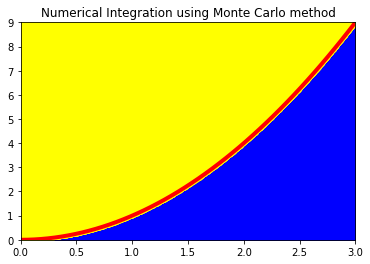

In [14]:
## Estipulando seed para tornar os resultados reprodutíveis
random.seed(2)

## Criando função a ser integrada
f = lambda xi: xi ** 2

## Definindo os limites do intervalo X [a, b]
# Definimos explicitamente como floats!
a = 0.0
b = 3.0

# Número de divisões da área do retângulo superior da integral
# Quanto mais divisões, mais precisa será a integral
NumSteps = 1000000

## Definindo listas
# Pontos abaixo da curva (que compõem a integral)
XIntegral = []
YIntegral = []
# Pontos acima da curva (que não compõem a integral)
XRectangle = []
YRectangle = []

## Inicializando mínimo e máximo no extremo esquerdo do intervalo X
ymin = f(a)
ymax = ymin

## Loopando para achar pontos de máximo e mínimo local
for i in range(NumSteps):
    # Aumentando o valor de x por uma fração de NumSteps
    x = a + (b - a) * float(i) / NumSteps
    y = f(x)
    # Avaliando o ponto e substituindo caso haja novos valores de máximo e mínimo
    if y < ymin: ymin = y
    if y > ymax: ymax = y

## Calculando área do retângulo
A = (b - a) * (ymax - ymin)

# Definindo o número de pares que queremos gerar...
N = NumSteps
# ... e o número de pontos que caem sob a curva
M = 0

## Repetindo a geração de pontos N vezes
for k in range(N):
    # Gerando um x que estará em algum lugar no intervalo [a, b]
    x = a + (b - a) * random.random()
    # Gerando um y que estará em algum lugar no intervalo [ymin, ymax]
    y = ymin + (ymax - ymin) * random.random()

    # Se o ponto y gerado está sob f(x), adicione à contagem e à lista dos pontos
    if y <= f(x):
            M += 1
            XIntegral.append(x)
            YIntegral.append(y)
    else:  # caso contrário, adicione à lista dos pontos sobre o retângulo
            XRectangle.append(x)
            YRectangle.append(y)

# Calculando a integral
NumericalIntegral = M / N * A
print (f"Numerical integration: {NumericalIntegral}")

### Plottando
## Espaços X e Y
XLin = np.linspace(a,b)
YLin = [f(x) for x in XLin]

## Gráfico
# Definindo limites dos eixos X e Y
plt.axis([0, b, 0, f(b)])
# Plottando a curva da função em vermelho
plt.plot(XLin, YLin, color="red", linewidth="4")
# Integral abaixo da curva em azul
plt.scatter(XIntegral, YIntegral, color="blue", marker=".")
# Área cima da curva em amarelo
plt.scatter(XRectangle, YRectangle, color="yellow", marker=".")
# Título e mostrando o gráfico
plt.title("Numerical Integration using Monte Carlo method")
plt.show()